<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras</h2>
<h3 style="color:rgb(0,120,170)">3 ways to create a Machine Learning model with Keras and TensorFlow 2.0</h3>

[Source](https://medium.com/@bindiatwork/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

2022-09-09 22:30:19.374643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-09 22:30:19.374663: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)
try:
    physical_devices = tf.config.list_physical_devices('GPU') 
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print(physical_devices)
except:
    print("No GPU")

2.9.1
[]


2022-09-09 22:30:22.328919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 22:30:22.329168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-09 22:30:22.329224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-09 22:30:22.329274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-09 22:30:22.329324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## Exploring Data

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.label.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Preparing data for Keras and TensorFlow

In [5]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [8]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
X_train[0]

array([6.2, 2.8, 4.8, 1.8])

## 1. Sequential model

In [10]:
# A) Passing a list of layers to the constructor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(5, activation='relu', input_shape=(4,)),
                    Dense(10, activation='relu'),
                    Dense(3, activation='softmax'),
                   ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


2022-02-19 10:10:27.169225: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-19 10:10:27.169910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:10:27.170068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:10:27.170180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [11]:
# B) Adding layer via add() method

model_seq = Sequential()
model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
model_seq.add(Dense(10, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 25        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 1.1 Training a Sequential model

In [12]:
model_seq.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [13]:
history = model_seq.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Epoch 1/30
2/2 [==============================] - 1s 121ms/step - loss: 3.0648 - accuracy: 0.3596 - val_loss: 4.2114 - val_accuracy: 0.1304
Epoch 2/30
2/2 [==============================] - 0s 18ms/step - loss: 2.8253 - accuracy: 0.3596 - val_loss: 3.9690 - val_accuracy: 0.1304
Epoch 3/30
2/2 [==============================] - 0s 24ms/step - loss: 2.6706 - accuracy: 0.3596 - val_loss: 3.7722 - val_accuracy: 0.1304
Epoch 4/30
2/2 [==============================] - 0s 19ms/step - loss: 2.5417 - accuracy: 0.3596 - val_loss: 3.5979 - val_accuracy: 0.1304
Epoch 5/30
2/2 [==============================] - 0s 18ms/step - loss: 2.4286 - accuracy: 0.3596 - val_loss: 3.4274 - val_accuracy: 0.1304
Epoch 6/30
2/2 [==============================] - 0s 18ms/step - loss: 2.3235 - accuracy: 0.3596 - val_loss: 3.2836 - val_accuracy: 0.1304
Epoch 7/30
2/2 [==============================] - 0s 19ms/step - loss: 2.2371 - accuracy: 0.3596 - val_loss: 3.1749 - val_accuracy: 0.1304
Epoch 8/30
2/2 [==========

### 1.2 Model Evaluation

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

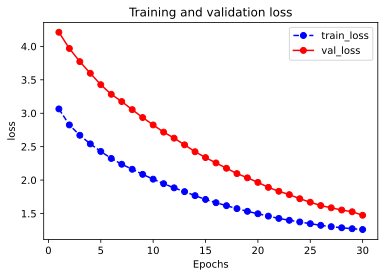

In [15]:
plot_metric(history, 'loss')

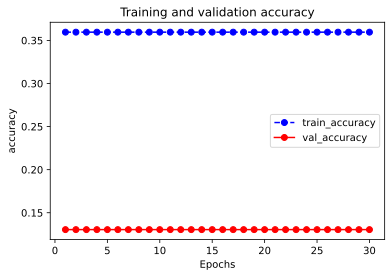

In [16]:
plot_metric(history, 'accuracy')

In [17]:
model_seq.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.3135 - accuracy: 0.3947


[1.3134524822235107, 0.3947368562221527]

## 2. Functional API

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2.1 Training a Function API model
Such model can be trained just like Keras Sequential model

In [19]:
# First configure model using model.compile()
model_fun_api.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Epoch 1/30
2/2 [==============================] - 0s 104ms/step - loss: 1.3823 - accuracy: 0.1573 - val_loss: 1.2441 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 18ms/step - loss: 1.3471 - accuracy: 0.0000e+00 - val_loss: 1.2302 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 17ms/step - loss: 1.3252 - accuracy: 0.0000e+00 - val_loss: 1.2200 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 20ms/step - loss: 1.3081 - accuracy: 0.0000e+00 - val_loss: 1.2119 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 18ms/step - loss: 1.2941 - accuracy: 0.0000e+00 - val_loss: 1.2048 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 18ms/step - loss: 1.2810 - accuracy: 0.0000e+00 - val_loss: 1.1984 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 17ms/step - loss: 1.2695 - accuracy: 0.0000e+00 - val_loss: 1.1930 -

### 2.2 Model Evaluation

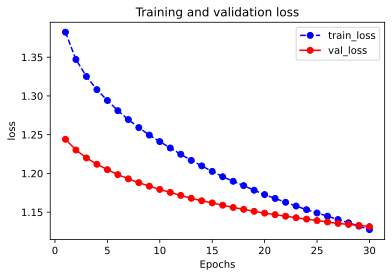

In [20]:
plot_metric(history, 'loss')

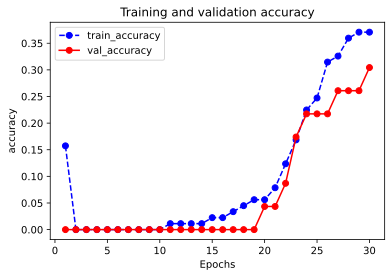

In [21]:
plot_metric(history, 'accuracy')

In [22]:
model_fun_api.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.1491 - accuracy: 0.1842


[1.149149775505066, 0.18421052396297455]

### 2.3 Multi-input and multi-output model

#### For the scenario with 2 inputs and 1 output

In [23]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='sigmoid', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structure (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 10)           50          ['input_structure[0][0]']        
                                                                                                  
 dense_10 (Dense)               (None, 100)          25700       ['input_image[0][0]']            
                                                                                            

#### For the scenario with 1 input and 2 outputs

In [24]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                                  
 output_1 (Dense)               (None, 1)            301         ['dense_11[0][0]']               
                                                                                                  
 output_2 (Dense)               (None, 3)            903         ['dense_11[0][0]']               
                                                                                            

#### For the scenario with 2 inputs and 2 outputs

In [25]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structured (InputLayer)  [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10)           50          ['input_structured[0][0]']       
                                                                                                  
 dense_13 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                            

### 2.4 Shared layer in Functional API

In [26]:
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
shared_layer = Dense(4, activation='relu')

# Now we apply the layer three times
x = shared_layer(inputs)
x = shared_layer(x)
x = shared_layer(x)
x = shared_layer(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 4)            20          ['input_2[0][0]',                
                                                                  'dense_14[0][0]',               
                                                                  'dense_14[1][0]',               
                                                                  'dense_14[2][0]']               
                                                                                                  
 dense_15 (Dense)               (None, 3)            15          ['dense_14[3][0]']         

## 3. Model Subclassing

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class CustomModel(Model):
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

my_custom_model = CustomModel(name='my_custom_model')

### 3.1 Training a Model Subclassing model

In [28]:
my_custom_model.compile(optimizer='rmsprop', 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

history = my_custom_model.fit(X_train, y_train, 
                              batch_size= 64,
                              epochs= 30,
                              validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 0s 111ms/step - loss: 1.5139 - accuracy: 0.3820 - val_loss: 1.5278 - val_accuracy: 0.3913
Epoch 2/30
2/2 [==============================] - 0s 21ms/step - loss: 1.3826 - accuracy: 0.3820 - val_loss: 1.4413 - val_accuracy: 0.3913
Epoch 3/30
2/2 [==============================] - 0s 19ms/step - loss: 1.3113 - accuracy: 0.3820 - val_loss: 1.3794 - val_accuracy: 0.3913
Epoch 4/30
2/2 [==============================] - 0s 21ms/step - loss: 1.2594 - accuracy: 0.3820 - val_loss: 1.3289 - val_accuracy: 0.3913
Epoch 5/30
2/2 [==============================] - 0s 19ms/step - loss: 1.2147 - accuracy: 0.3820 - val_loss: 1.2786 - val_accuracy: 0.3913
Epoch 6/30
2/2 [==============================] - 0s 21ms/step - loss: 1.1761 - accuracy: 0.3820 - val_loss: 1.2339 - val_accuracy: 0.3913
Epoch 7/30
2/2 [==============================] - 0s 18ms/step - loss: 1.1403 - accuracy: 0.3820 - val_loss: 1.1892 - val_accuracy: 0.3913
Epoch 8/30
2/2 [==========

In [29]:
my_custom_model.summary()

Model: "my_custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            multiple                  25        
                                                                 
 dense_17 (Dense)            multiple                  60        
                                                                 
 dense_18 (Dense)            multiple                  33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 3.2 Model Evaluation

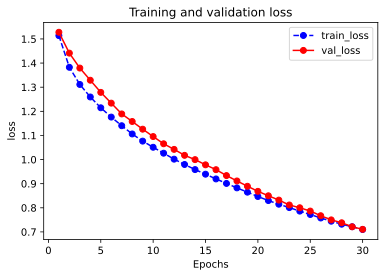

In [30]:
plot_metric(history, 'loss')

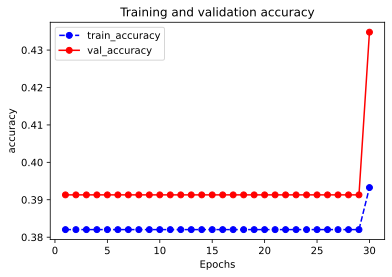

In [31]:
plot_metric(history, 'accuracy')

In [32]:
my_custom_model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.7833 - accuracy: 0.1842


[0.7832832336425781, 0.18421052396297455]